### Breast Cancer Dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [159]:
# this is unrelated to the class .. It just helps displaying all outputs in a cell instead of just last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [160]:
# importing the breast cancer dataset in tensorflow from UCI.edu
import tensorflow as tf
dataset= tf.keras.utils.get_file("breast_cancer_data", "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data")
dataset

'/Users/shreedharsapkota/.keras/datasets/breast_cancer_data'

In [161]:
# Loading the files by creating the columns as mentioned in the data above.
import pandas as pd
column_name=['ID_number','Diagnosis','Radius', 'Texture', 'Perimeter', 'Area','Smoothness','Compactness','Concavity','Concave_points','Symmetry','Fractal_dimension','Radius_se', 'Texture_se', 'Perimeter_se', 'Area_se','Smoothness_se','Compactness_se','Concavity_se','Concave_points_se','Symmetry_se','Fractal_dimension_se', 'Radius_worst','Texture_worst', 'Perimeter_worst', 'Area_worst','Smoothness_worst','Compactness_worst','Concavity_worst','Concave_points_worst','Symmetry_worst','Fractal_dimension_worst']
df=pd.read_csv(dataset, names=column_name)

In [162]:
# Exploring some of the data
df.head()
df.describe()

,ID_number,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,ID_number,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [163]:
# Calculating the number of Maliginant and Benign patients in the data
print("Number of Maliginant: ",len(df[df["Diagnosis"]=='M']))
print("Number of Benign: ",len(df[df["Diagnosis"]=='B']))

Number of Maliginant:  212
Number of Benign:  357


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14d2cff28>,
      dtype=object)

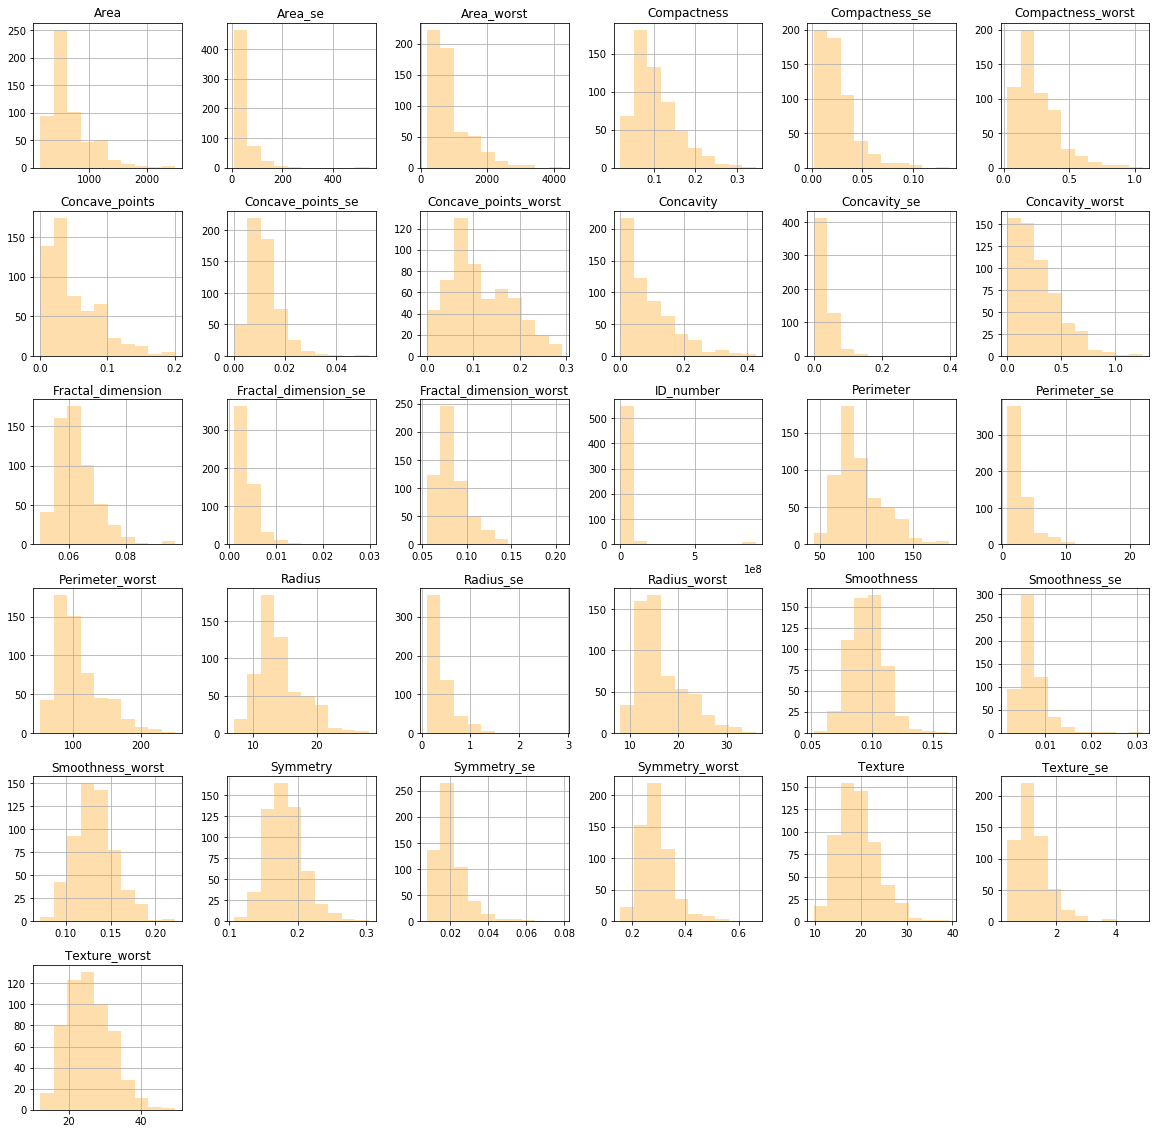

In [164]:
# Using seaborn to plot the data
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
df.hist(figsize=(20,20),color='navajowhite')
plt.show()

In [165]:
# As in the dataset we can see that diagnosis column consists of 'M'and 'B' but we need to convert them into numericals
df['Diagnosis']=df['Diagnosis'].astype('category').cat.codes

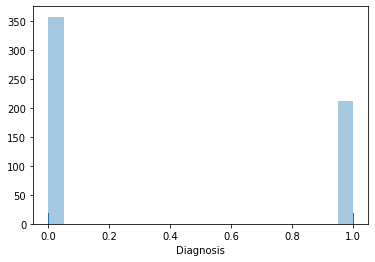

In [166]:
# Plot the Diagnosis data
sns.distplot(df["Diagnosis"],bins=20, kde=False, rug=True);

In [167]:
# dropping the unnecessary columns
data=df.drop(['ID_number'], axis = 1)

### Logistic Regression

In [169]:
# Split datasets, one for training & test, and using scaler to scale the datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = data.loc[:, data.columns != 'Diagnosis']
Y = data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=60)
X_train_scale = scalar.fit_transform(X_train)
X_test_scale = scalar.transform(X_test)

In [170]:
# Using Logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scale, y_train)

/Users/shreedharsapkota/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [171]:
# Showing the training score. 
train_score = logreg.score(X_train_scale, y_train)
print('Training accuracy is ', train_score)
# Showing the testing score. 
test_score = logreg.score(X_test_scale, y_test)
print('Testing accuracy is ', test_score)

Training accuracy is  0.9849246231155779
Testing accuracy is  0.9824561403508771


In [172]:
# Calculating the coefficient and intercept from above linear regression model
logreg.coef_
logreg.intercept_

array([[ 0.32742626,  0.26868928,  0.29236459,  0.38666931, -0.09231578,
        -0.46250205,  0.82122984,  0.93399453, -0.10467799, -0.08421692,
         1.32857166,  0.14907269,  0.54177847,  0.93045401,  0.32631831,
        -0.72378647,  0.12616124,  0.25146046, -0.28225045, -0.94077384,
         0.93407195,  1.03357782,  0.68556232,  0.85296726,  0.76352913,
        -0.00725603,  1.01415312,  0.65888134,  0.8214374 ,  0.42633353]])

array([-0.12054261])

In [173]:
#Calculating the probability
pred= logreg.predict(X_test_scale)
prob= logreg.predict_proba(X_test_scale)

In [174]:
# Looking at the data set prediction and actual label
rel=pd.DataFrame(prob)
rel["pred"]= pred
rel["actual_Label"]= y_test.to_list()
rel

,0,1,pred,actual_Label
0,8.702561e-02,9.129744e-01,1,1
1,5.636669e-01,4.363331e-01,0,0
2,9.975291e-01,2.470906e-03,0,0
3,1.841084e-02,9.815892e-01,1,1
4,9.985160e-01,1.483967e-03,0,0
5,1.115525e-10,1.000000e+00,1,1
6,5.779138e-02,9.422086e-01,1,1
7,1.498392e-09,1.000000e+00,1,1
8,2.542570e-01,7.457430e-01,1,0
9,9.951556e-01,4.844414e-03,0,0


In [175]:
# Calculating the recall, precision and F1 Score
from sklearn.metrics import classification_report, confusion_matrix
# Creating the confusion Matrix
print(confusion_matrix(y_test, pred))
# Creating the classification report
print(classification_report(y_test, pred))

[[109   2]
 [  1  59]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       111
           1       0.97      0.98      0.98        60

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



0.9974474474474475

Text(0.5, 1.0, 'ROC curve')

Text(0.5, 0, 'False positive rate')

Text(0, 0.5, 'True positive rate')

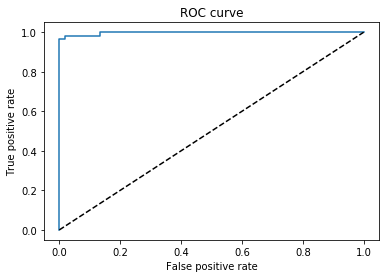

In [176]:
#Plotting the RoC Curve
from sklearn import metrics
fpr,tpr,thre= metrics.roc_curve(y_test, prob[:,1])
plt.plot(fpr, tpr)

# Calculate the area under the curve
metrics.auc(fpr,tpr)
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

# Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

We can see that when we use logistic Regression model that the accuracy is 98% and we know Accuracy is not only oject to determine if the model is good or not. We have to look at the prediction, recall and F1 score as well. We can see that through classification matrix. We can see that the higher the AUC, better the model to predict. 

In [177]:

cfm = confusion_matrix(y_test, pred)

true_negative = cfm[0][0]
false_positive = cfm[0][1]
false_negative = cfm[1][0]
true_positive = cfm[1][1]

print('Confusion Matrix: \n', cfm, '\n')

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print('Correct Predictions', 
      round((true_negative + true_positive) / len(pred) * 100, 1), '%')


Confusion Matrix: 
 [[109   2]
 [  1  59]] 

True Negative: 109
False Positive: 2
False Negative: 1
True Positive: 59
Correct Predictions 98.2 %


### DNN Tensorflow Keras

In [178]:
# Using normalization in the dataset
import tensorflow as tf
train_set_x=tf.keras.utils.normalize(X, axis=1)
train_set_x.shape

(569, 30)

In [179]:
# # Using tensflow to build a model using various hidden layers
from tensorflow.keras import models, layers, regularizers
model = models.Sequential()
model.add(layers.Dense(200, activation='relu', input_dim=30)) # Since we have 30 features we will get input_dim=30
model.add(layers.Dense(120, activation = 'relu', kernel_initializer='uniform'))
model.add(layers.Dense(55, activation = 'relu', kernel_initializer='uniform'))
model.add(layers.Dense(1, kernel_initializer='uniform', activation = 'sigmoid'))

Here we have used tensorflow keras model, where we have used hidden layers of 200, 150 55 and ouput as 1. This is because  it is a binanry output of 0 and 1. Relu is used as activation.

In [180]:
model.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])

In [181]:
model.fit(train_set_x, Y, epochs=500,batch_size=50)# epochs is the iteration

Train on 569 samples
Epoch 1/500
569/569 [==============================] - 1s 984us/sample - loss: 0.6902 - accuracy: 0.6134
Epoch 2/500
569/569 [==============================] - 0s 67us/sample - loss: 0.6766 - accuracy: 0.6274
Epoch 3/500
569/569 [==============================] - 0s 64us/sample - loss: 0.6596 - accuracy: 0.6274
Epoch 4/500
569/569 [==============================] - 0s 68us/sample - loss: 0.6510 - accuracy: 0.6274
Epoch 5/500
569/569 [==============================] - 0s 81us/sample - loss: 0.6472 - accuracy: 0.6274
Epoch 6/500
569/569 [==============================] - 0s 124us/sample - loss: 0.6347 - accuracy: 0.6274
Epoch 7/500
569/569 [==============================] - 0s 70us/sample - loss: 0.6185 - accuracy: 0.6274
Epoch 8/500
569/569 [==============================] - 0s 112us/sample - loss: 0.5906 - accuracy: 0.6397
Epoch 9/500
569/569 [==============================] - 0s 78us/sample - loss: 0.5403 - accuracy: 0.6995
Epoch 10/500
569/569 [==================

In [183]:
scores = model.evaluate(train_set_x, Y)
print(model.metrics_names[1], scores[1]*100)

569/569 [==============================] - 0s 110us/sample - loss: 0.0825 - accuracy: 0.9631
accuracy 96.30931615829468


The accuracy of this model is 96.30%, which is good but not better like logistic regression model

In [184]:
prob_keras = model.predict(train_set_x[:5])
pred_keras = model.predict_classes(train_set_x[:5])
print(prob_keras)
pred_keras

[[0.9996828 ]
 [0.99907887]
 [0.9988871 ]
 [0.9572717 ]
 [0.997447  ]]


array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [185]:
from sklearn.metrics import classification_report
pred = model.predict_classes(train_set_x)
print(confusion_matrix(Y, pred))
print(classification_report(Y, pred))

[[344  13]
 [  8 204]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       357
           1       0.94      0.96      0.95       212

    accuracy                           0.96       569
   macro avg       0.96      0.96      0.96       569
weighted avg       0.96      0.96      0.96       569



Text(0.5, 1.0, 'ROC curve')

Text(0.5, 0, 'False positive rate')

Text(0, 0.5, 'True positive rate')

0.9956926166693093

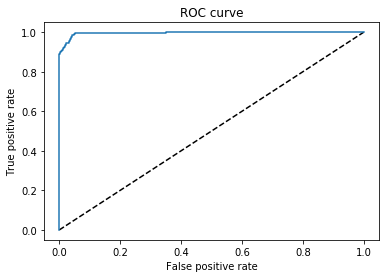

In [186]:
from sklearn import metrics
prob_keras = model.predict(train_set_x)
#Plotting the RoC Curve
fpr,tpr,thre= metrics.roc_curve(Y, prob_keras)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

# Calculate the area under the curve
metrics.auc(fpr,tpr)

Here we can see that the Precision, Recall and F1 scores are high and above 96. When we see the ROC curve its really nice curve and close towards 1. Here we can see the area under curve (AUC) is 99.56%. This is similar to logistic regression.

### Random Forest

In [187]:
# Building the random forest model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_scale, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [188]:
# Calculate the Train Accuracy
train_score = rfc.score(X_train_scale, y_train)
print("Train Accuracy:",train_score)

# Calculate the Test Accuracy
test_score = rfc.score(X_test_scale, y_test)
print("Test Accuracy:",test_score)

Train Accuracy: 1.0
Test Accuracy: 0.9707602339181286


In [189]:
# Predicting the model
rfc_pred = rfc.predict(X_test_scale)
rfc_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int8)

In [190]:
# Creating the classification report
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[108   3]
 [  2  58]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       111
           1       0.95      0.97      0.96        60

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



Text(0.5, 1.0, 'ROC curve')

Text(0.5, 0, 'False positive rate')

Text(0, 0.5, 'True positive rate')

0.9939189189189189

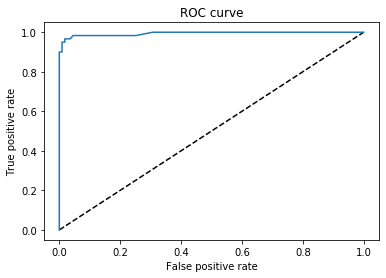

In [191]:
from sklearn import metrics
prob=rfc.predict_proba(X_test_scale)

# Plot the ROC Curve for test

fpr,tpr,thre=metrics.roc_curve(y_test, prob[:,1]) 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

# Area under curve
metrics.auc(fpr,tpr)

Here, can see that all three models have very High accuracy and auc.